# Практическая работа №4 Дерево решений и метрики

__Цель__ - Обучить модель "Дерево решений" и проверить её точность.

Для начала импортируем все библиотеки, которые необходимы для выполнения работы

NumPy - это библиотека для языка программирования Python, которая предоставляет поддержку для работы с многомерными массивами и матрицами, а также большой набор функций для выполнения операций линейной алгебры, математических операций и трансформаций данных. Она является основной библиотекой для научных вычислений в Python.

In [1]:
import numpy as np

Pandas - это библиотека для языка программирования Python, предназначенная для обработки и анализа данных. Она предоставляет структуры данных, называемые DataFrame, которые облегчают манипуляции и анализ табличных данных, включая чтение и запись данных из различных форматов файлов, фильтрацию, сортировку, агрегацию и многое другое.

In [2]:
import pandas as pd

Seaborn - это библиотека визуализации данных для языка программирования Python, основанная на библиотеке Matplotlib. Она предоставляет простой и красивый интерфейс для создания информативных и стильных графиков. Seaborn обычно используется для статистической визуализации данных, построения графиков распределения, связей и т.д.

In [4]:
import seaborn as sns

Matplotlib - это библиотека для визуализации данных для языка программирования Python. Она предоставляет широкий спектр функций для создания различных видов графиков, диаграмм, рисунков и других визуализаций. Matplotlib может быть использован как самостоятельно, так и в сочетании с другими библиотеками, такими как NumPy и Pandas.

In [5]:
import matplotlib.pyplot as plt

scikit-learn  - это библиотека машинного обучения для языка программирования Python. Она предоставляет инструменты для разработки и применения различных моделей машинного обучения, таких как классификация, регрессия, кластеризация и другие. В данном коде импортируются несколько классов и функций, связанных с деревьями принятия решений (Decision Tree Classifier) и оценкой моделей (metrics). В частности, функция train_test_split используется для разделения данных на обучающую и тестовую выборки.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics

Затем считаем данные из csv файла

In [7]:
df = pd.read_csv('pr3_clear.csv') #Перенос данных из датасета "vgsales_15_clear1.csv" в переменную "df"
df #Вывод данных из переменной

Unnamed: 0   Rank                                        Name Platform  \
0             0  13292                               E.X. Troopers      PS3   
1             1  15041    Steins;Gate: Senkei Kousoku no Phonogram     X360   
2             2  15717                            This War of Mine      PS4   
3             3  14047                         Kiniro no Corda 2 f      PSP   
4             4   5127                            Turok: Rage Wars      N64   
..          ...    ...                                         ...      ...   
537         548  12286                                My Pet Chimp       DS   
538         549  10521                     God Eater 2: Rage Burst      PS4   
539         550   4981                              Triple Play 97       PS   
540         551   1157  Dragon Quest V: Hand of the Heavenly Bride       DS   
541         552  10192     Tales of Phantasia (PS1 & PSP Versions)      PSP   

       Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0    2012.0    8.0         20  0.000000  0.000000  1.000000     0.000000   
1    2013.0    1.0          1  0.000000  0.000000  1.000000     0.000000   
2    2016.0    0.0         29  0.000000  1.000000  0.000000     0.000000   
3    2009.0    7.0        114  0.000000  0.000000  1.000000     0.000000   
4    1999.0    8.0          4  0.980581  0.196116  0.000000     0.000000   
..      ...    ...        ...       ...       ...       ...          ...   
537  2010.0    9.0          0  1.000000  0.000000  0.000000     0.000000   
538  2015.0    7.0         79  0.000000  0.110432  0.993884     0.000000   
539  1996.0   10.0         35  0.808290  0.577350  0.000000     0.115470   
540  2008.0    7.0        105  0.138333  0.014561  0.990172     0.014561   
541  2006.0    7.0         79  0.000000  0.000000  1.000000     0.000000   

     Global_Sales  
0            0.05  
1            0.02  
2            0.02  
3            0.04  
4            0.37  
..            ...  
537          0.06  
538          0.10  
539          0.38  
540          1.60  
541          0.11  

[542 rows x 12 columns]

1. Обучение модели "Дерево решений" без использования гиперпараметров

Модель "Дерево решений" (Decision Tree) - это графическое представление алгоритма принятия решений, которое используется в машинном обучении и искусственном интеллекте. Она представляет собой дерево, в котором каждый узел представляет собой решение, а каждое ребро - возможный исход этого решения.

Для начала преобразуем данные столбца платформы в категориальные значения, пользуюсь знаниями из 3 практической

In [8]:
from sklearn.preprocessing import OrdinalEncoder


OEnc = OrdinalEncoder()

# Обучение OrdinalEncoder на уникальных значениях столбца "Genre"
OEnc.fit(df[["Platform"]])

transformed_data = OEnc.transform(df[["Platform"]])


Затем также, пользуясь знаниями из 3 парктической переносим эти данные в наш набор данным

In [9]:
df[["Platform"]] = OEnc.transform(df[["Platform"]]) #Перенос преобразованных данных в изначальный датасет
df #Вывод данных из датасета

Unnamed: 0   Rank                                        Name  Platform  \
0             0  13292                               E.X. Troopers      13.0   
1             1  15041    Steins;Gate: Senkei Kousoku no Phonogram      21.0   
2             2  15717                            This War of Mine      14.0   
3             3  14047                         Kiniro no Corda 2 f      15.0   
4             4   5127                            Turok: Rage Wars       8.0   
..          ...    ...                                         ...       ...   
537         548  12286                                My Pet Chimp       3.0   
538         549  10521                     God Eater 2: Rage Burst      14.0   
539         550   4981                              Triple Play 97      11.0   
540         551   1157  Dragon Quest V: Hand of the Heavenly Bride       3.0   
541         552  10192     Tales of Phantasia (PS1 & PSP Versions)      15.0   

       Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0    2012.0    8.0         20  0.000000  0.000000  1.000000     0.000000   
1    2013.0    1.0          1  0.000000  0.000000  1.000000     0.000000   
2    2016.0    0.0         29  0.000000  1.000000  0.000000     0.000000   
3    2009.0    7.0        114  0.000000  0.000000  1.000000     0.000000   
4    1999.0    8.0          4  0.980581  0.196116  0.000000     0.000000   
..      ...    ...        ...       ...       ...       ...          ...   
537  2010.0    9.0          0  1.000000  0.000000  0.000000     0.000000   
538  2015.0    7.0         79  0.000000  0.110432  0.993884     0.000000   
539  1996.0   10.0         35  0.808290  0.577350  0.000000     0.115470   
540  2008.0    7.0        105  0.138333  0.014561  0.990172     0.014561   
541  2006.0    7.0         79  0.000000  0.000000  1.000000     0.000000   

     Global_Sales  
0            0.05  
1            0.02  
2            0.02  
3            0.04  
4            0.37  
..            ...  
537          0.06  
538          0.10  
539          0.38  
540          1.60  
541          0.11  

[542 rows x 12 columns]

Затем преобразуем эти значения, для обучения

In [10]:
df_encoded = pd.get_dummies(df, columns=['Name'])  # Преобразование категориальных переменных в фиктивные переменные (One-Hot Encoding) для столбца 'Name'
df_encoded = df_encoded.dropna()  # Удаление всех строк, содержащих пропущенные значения
df_encoded["Platform"] = np.where(df_encoded["Platform"] == 21.0, 1, 0)  # Замена значений 'Genre' равных 21.0 на 1, остальные значения на 0
df_encoded  # Вывод преобразованного DataFrame


Unnamed: 0   Rank  Platform    Year  Genre  Publisher  NA_Sales  \
0             0  13292         0  2012.0    8.0         20  0.000000   
1             1  15041         1  2013.0    1.0          1  0.000000   
2             2  15717         0  2016.0    0.0         29  0.000000   
3             3  14047         0  2009.0    7.0        114  0.000000   
4             4   5127         0  1999.0    8.0          4  0.980581   
..          ...    ...       ...     ...    ...        ...       ...   
537         548  12286         0  2010.0    9.0          0  1.000000   
538         549  10521         0  2015.0    7.0         79  0.000000   
539         550   4981         0  1996.0   10.0         35  0.808290   
540         551   1157         0  2008.0    7.0        105  0.138333   
541         552  10192         0  2006.0    7.0         79  0.000000   

     EU_Sales  JP_Sales  Other_Sales  ...  Name_X-COM: UFO Defense  \
0    0.000000  1.000000     0.000000  ...                        0   
1    0.000000  1.000000     0.000000  ...                        0   
2    1.000000  0.000000     0.000000  ...                        0   
3    0.000000  1.000000     0.000000  ...                        0   
4    0.196116  0.000000     0.000000  ...                        0   
..        ...       ...          ...  ...                      ...   
537  0.000000  0.000000     0.000000  ...                        0   
538  0.110432  0.993884     0.000000  ...                        0   
539  0.577350  0.000000     0.115470  ...                        0   
540  0.014561  0.990172     0.014561  ...                        0   
541  0.000000  1.000000     0.000000  ...                        0   

     Name_X-Men Origins: Wolverine  Name_Yarudora Series Vol.1: Double Cast  \
0                                0                                        0   
1                                0                                        0   
2                                0                                        0   
3                                0                                        0   
4                                0                                        0   
..                             ...                                      ...   
537                              0                                        0   
538                              0                                        0   
539                              0                                        0   
540                              0                                        0   
541                              0                                        0   

     Name_Young Justice: Legacy  Name_Ys: The Ark of Napishtim  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   
..                          ...                            ...   
537                           0                              0   
538                           0                              0   
539                           0                              0   
540                           0                              0   
541                           0                              0   

     Name_Yu-Gi-Oh! Double Pack  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   
..                          ...   
537                           0   
538                           0   
539                           0   
540                           0   
541                           0   

     Name_Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyoukai Kounin: KanKen DS 2 + Jouyou Kanji Jiten  \
0                              

Здесь мы видим что все значения в столбце Platform поменялись на 0 и 1

В данном коде выполняется разделение данных на обучающую и тестовую выборки для последующего обучения модели и оценки ее производительности. При этом целевая переменная "Genre" сохраняется в отдельной переменной `Y`, а все остальные столбцы, за исключением "Genre", используются в качестве признаков и сохраняются в переменной `X`.

In [11]:
Y = df_encoded["Platform"]  # Выделение столбца "Platform" в переменную Y, которая будет содержать целевую переменную
X = df_encoded.drop(columns=["Platform", "Genre", "Publisher"])  # Создание переменной X, содержащей все столбцы, кроме "Platform", в качестве признаков

# Разделение данных на обучающую и тестовую выборки
# X_train и Y_train - обучающие признаки и целевая переменная
# X_test и Y_test - тестовые признаки и целевая переменная
# test_size = 0.2 означает, что 20% данных будут отведены для тестовой выборки
# random_state = 42 гарантирует воспроизводимость результатов
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Затем вызовем дерево решений при помщи класса DecisionTreeClassifier()

In [12]:
dtc = DecisionTreeClassifier() #Вызов модели без гиперпараметров

dtc = dtc.fit(X_train, Y_train) #Обучение модели на обучающей выборке без надстроек

from sklearn import tree #Подключение библиотеки необходимой для работы
plt.figure(figsize=(60,60),dpi=300); #Создание фигуры для вывода дерева
tree.plot_tree(dtc,filled=True, fontsize = 20); #Вывод дерева решений без надстроек

На картинке свреху отображается дерево решений

# Матрица ошибок и тепловая карта

In [13]:
Y_predict = dtc.predict(X_test) #Проводим предсказание, по которому будем сверять

Confusion matrix (матрица ошибок) - это таблица, которая показывает, сколько объектов было верно или неверно классифицировано моделью. Confusion matrix часто используется в задачах классификации для оценки производительности модели. Она позволяет оценить, насколько хорошо модель справляется с каждым классом.

In [14]:
con_mat = metrics.confusion_matrix(Y_test, Y_predict) #Создание матрицы ошибок
con_mat #Вывод данных из переменной


array([[95,  5],
       [ 6,  3]], dtype=int64)

Этот массив состоит из 4 элементов 

1. True Positive - это количество объектов, которые были правильно классифицированы как положительные.(97)

2. False Positive - это количество объектов, которые были неправильно классифицированы как положительные.(2)

3. False Negative - это количество объектов, которые были неправильно классифицированы как отрицательные.(10)

4. True Negative - это количество объектов, которые были правильно классифицированы как отрицательные.(2)

На основании этих даннных можно вывести тепловую карту, на которой визуализируются данные об ошибках

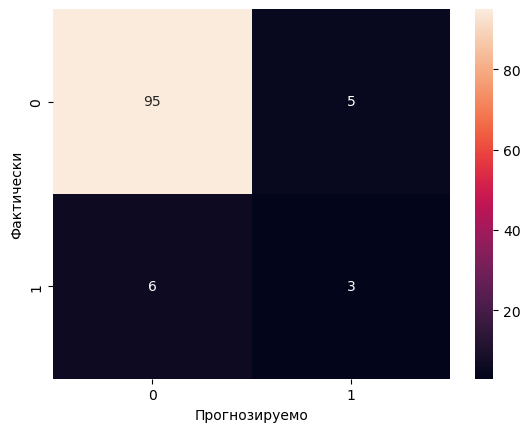

In [15]:
sns.heatmap(con_mat, annot=True, fmt="d"); #Создание тепловой карты на основе матрицы ошибок
plt.xlabel("Прогнозируемо"); #Подпись на оси Х на тепловой карте
plt.ylabel("Фактически"); #Подпись на оси Y на тепловой карте

# Accuracy_score - точность

Accuracy score (точность) - это метрика, которая измеряет долю правильно классифицированных объектов моделью. Она рассчитывается путем деления числа правильно классифицированных объектов на общее количество объектов в выборке.

In [16]:
metrics.accuracy_score(Y_test, Y_predict)

0.8990825688073395

Метод суммирует правильные предсказанные значения и делит на весь датасет

# Recall_score - чувствительность

Recall score (чувствительность) - это метрика, которая показывает, какую долю объектов положительного класса модель классифицировала верно. Она вычисляется как отношение числа верно классифицированных положительных объектов к общему числу положительных объектов.

In [17]:
metrics.recall_score(Y_test, Y_predict)

0.3333333333333333

как видим получилась очень маленькая аккуратность

# F1_score


F1 score - это гармоническое среднее между precision score и recall score. Она позволяет оценить баланс между точностью и полнотой модели.

In [18]:
metrics.f1_score(Y_test, Y_predict)

0.35294117647058826

# Обучение модели "Дерево решений" с использованием гиперпараметров

In [19]:
Y = df_encoded["Platform"]  # Выделение столбца "Platform" в переменную Y, которая будет содержать целевую переменную
X = df_encoded.drop(columns=["Platform", "Genre", "Publisher"])  # Создание переменной X, содержащей все столбцы, кроме "Platform", в качестве признаков

# Разделение данных на обучающую и тестовую выборки
# X_train и Y_train - обучающие признаки и целевая переменная
# X_test и Y_test - тестовые признаки и целевая переменная
# test_size = 0.2 означает, что 20% данных будут отведены для тестовой выборки
# random_state = 42 гарантирует воспроизводимость результатов
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [20]:
dtc_plot = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,max_leaf_nodes=200) #Создание объекта класса "DecisionTreeClassifier" с заданными параметрами
dtc_plot = dtc_plot.fit(X_train, Y_train) #Обучение модели на тренировочных данных, которые были подготовлены ранее

In [21]:
plt.figure(figsize=(60,60),dpi=300); #Создание фигуры для вывода дерева
tree.plot_tree(dtc_plot,filled=True, fontsize = 10); #Вывод дерева решений без надстроек

Как видим на этой картнке появилось "Дерево решений" с использованием гиперпараметров

Так же как и с прошлой моделью проанализируем точность датасета 

In [22]:
Y_predict = dtc.predict(X_test) #Проводим предсказание, по которому будем сверять

Confusion matrix (матрица ошибок) - это таблица, которая показывает, сколько объектов было верно или неверно классифицировано моделью. Confusion matrix часто используется в задачах классификации для оценки производительности модели. Она позволяет оценить, насколько хорошо модель справляется с каждым классом.

In [23]:
con_mat = metrics.confusion_matrix(Y_test, Y_predict) #Создание матрицы ошибок
con_mat #Вывод данных из переменной


array([[95,  5],
       [ 6,  3]], dtype=int64)

Этот массив состоит из 4 элементов 

1. True Positive - это количество объектов, которые были правильно классифицированы как положительные.(97)

2. False Positive - это количество объектов, которые были неправильно классифицированы как положительные.(2)

3. False Negative - это количество объектов, которые были неправильно классифицированы как отрицательные.(10)

4. True Negative - это количество объектов, которые были правильно классифицированы как отрицательные.(2)

На основании этих даннных можно вывести тепловую карту, на которой визуализируются данные об ошибках

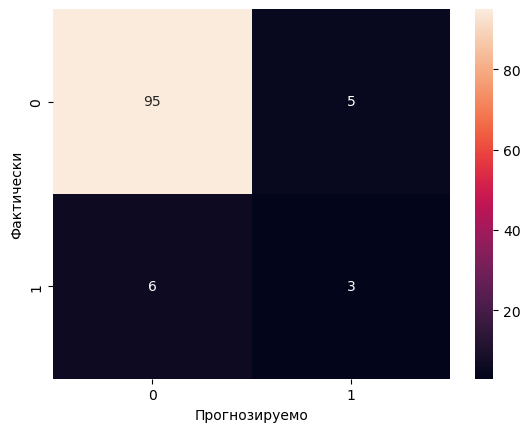

In [24]:
sns.heatmap(con_mat, annot=True, fmt="d"); #Создание тепловой карты на основе матрицы ошибок
plt.xlabel("Прогнозируемо"); #Подпись на оси Х на тепловой карте
plt.ylabel("Фактически"); #Подпись на оси Y на тепловой карте

# Accuracy_score - точность

Accuracy score (точность) - это метрика, которая измеряет долю правильно классифицированных объектов моделью. Она рассчитывается путем деления числа правильно классифицированных объектов на общее количество объектов в выборке.

In [25]:
metrics.accuracy_score(Y_test, Y_predict)

0.8990825688073395

Метод суммирует правильные предсказанные значения и делит на весь датасет

# Recall_score - чувствительность

Recall score (чувствительность) - это метрика, которая показывает, какую долю объектов положительного класса модель классифицировала верно. Она вычисляется как отношение числа верно классифицированных положительных объектов к общему числу положительных объектов.

In [26]:
metrics.recall_score(Y_test, Y_predict)

0.3333333333333333

как видим получилась очень маленькая аккуратность

# F1_score


F1 score - это гармоническое среднее между precision score и recall score. Она позволяет оценить баланс между точностью и полнотой модели.

In [27]:
metrics.f1_score(Y_test, Y_predict)

0.35294117647058826

Как видим немного поменялось во второй модели, точность и аккуратность остались на прежнем уровне

_Вывод_:В ходе выполнения данной практической работы, я приобрел знания в области построения деревьев решений и использования метрик. Я достиг заданных целей работы. В процессе практической работы я изучил классификатор DecisionTreeClassifier, который является одним из наиболее распространенных классификаторов, а также модуль metrics, который позволяет оценивать качество работы моделей.